In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sci

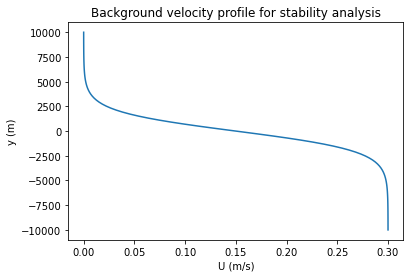

In [2]:
#Define variables 
N = 100
k = np.linspace(0,6,N)*1e-4


#Background velocity profile

y = np.linspace(-10,10,N)*1e3
U = 0.15*(1.+np.tanh(-1*y/2.e3))
plt.xlabel("U (m/s)")
plt.ylabel("y (m)")
plt.title("Background velocity profile for stability analysis")
plt.plot(U,y)

In [3]:
A = np.zeros([N,N])
B = np.zeros([N,N])

In [4]:
def initialize_wavenumber_matrix(k,U,A,B,y):
    '''
    Enter the wavenumber and fct will output corresponding matrices A and B
    '''
    
    
    A[0][0] = -1.*(U[1] - U[0])/(y[1]-y[0])**2 + U[0]*(-2./((y[1]-y[0])**2) - k**2)
    A[0][1] = U[0] / (y[1]-y[0])**2
    A[N-1][N-1] = -1.*(U[N-2] - U[N-1])/(y[1]-y[0])**2 + U[N-1]*(-2./((y[1]-y[0])**2) - k**2)
    A[N-1][N-2] = U[N-1] / (y[1]-y[0])**2 # U_1 and U_0 may need to be switched for vals at end of U instead (not sure if uniform)
    
    B[0][0] = -2./((y[1]-y[0])**2) - k**2
    B[0][1] = 1. / (y[1]-y[0])**2
    B[N-1][N-1] = -2./((y[1]-y[0])**2) - k**2
    B[N-1][N-2] = 1. / (y[1]-y[0])**2
    
    for i in range(1,99):
        A[i][i-1] = U[i] / (y[1]-y[0])**2
        A[i][i] = U[i]*((-2/(y[1]-y[0])**2) - k**2) - (U[i+1] + U[i-1] -2*U[i])/(y[1]-y[0])**2 #need to change k for all inputs of k probably add a function here
        A[i][i+1] = U[i] / (y[1]-y[0])**2
        B[i][i-1] = 1 / (y[1]-y[0])**2
        B[i][i] = (-2/(y[1]-y[0])**2) - k**2
        B[i][i+1] = 1 / (y[1]-y[0])**2
    return A,B

In [5]:
c = []
index = []
for i in range(0,len(k)):
    A,B = initialize_wavenumber_matrix(k[i],U,A,B,y)
    eigvals,eigvecs = sci.eig(A,B)
    curr = 0
    location = 0 
    for i in range(0,len(eigvals)):
        if(eigvals[i].imag < curr):
            curr = eigvals[i].imag
            location = i
    c.append(curr)
    index.append(location)

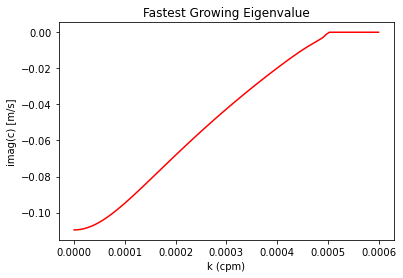

In [6]:
c
plt.xlabel("k (cpm)")
plt.ylabel("imag(c) [m/s]")
plt.title("Fastest Growing Eigenvalue")
plt.plot(k,c,color="r")

In [7]:
growth_rate = []
H = []
for i in range(0,len(k)):
    growth_rate.append(k[i]*c[i])

for j in range(0,len(growth_rate)):
        H.append(-1/growth_rate[j])

<ipython-input-7-b96d2f5c02a6>:7: RuntimeWarning: divide by zero encountered in double_scalars
  H.append(-1/growth_rate[j])


In [8]:
# make graph scale neater
k = k*1e4
k = np.linspace(1,5,N)*1e-4

H = np.array(H)
H = H/1000

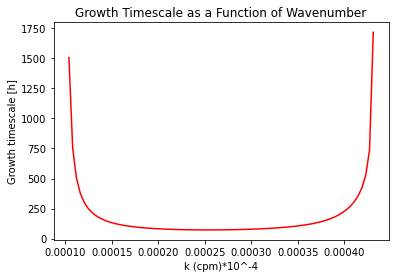

In [9]:
plt.xlabel("k (cpm)*10^-4")
plt.ylabel("Growth timescale [h]")
plt.title("Growth Timescale as a Function of Wavenumber")
plt.plot(k,H,color="r")